In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("passengers.csv")
print(df.head())

   Year    Month            Airline  Passengers
0  2018  January         Aeromexico        3048
1  2018  January    Alaska Airlines       25704
2  2018  January  American Airlines       68271
3  2018  January     China Airlines           0
4  2018  January    Delta Air Lines       13904


In [72]:
categories = {
    'Southwest Airlines': 'Domestic',
    'Delta Air Lines': 'Domestic',
    'United Airlines': 'Domestic',
    'American Airlines': 'Domestic',
    'Alaska Airlines': 'Domestic',
    'Frontier Airlines': 'Domestic',
    'JetBlue Airways': 'Domestic',
    'Spirit Airlines': 'Domestic',
    'Hawaiian Airlines': 'Domestic',
    'Volaris': 'International',
    'Aeromexico': 'International',
    'China Airlines': 'International',
    'All Others': 'Other'
}

# Map airlines to categories
df['Category'] = df['Airline'].map(categories)

# Replace any missing with 'Unknown'
df['Category'] = df['Category'].fillna('Unknown')

print(df[['Airline', 'Category']].head(10))

              Airline       Category
0          Aeromexico  International
1     Alaska Airlines       Domestic
2   American Airlines       Domestic
3      China Airlines  International
4     Delta Air Lines       Domestic
5   Frontier Airlines       Domestic
6  Southwest Airlines       Domestic
7     United Airlines       Domestic
8             Volaris  International
9          All Others          Other


In [73]:
df.head()

,Year,Month,Airline,Passengers,Category
0,2018,January,Aeromexico,3048,International
1,2018,January,Alaska Airlines,25704,Domestic
2,2018,January,American Airlines,68271,Domestic
3,2018,January,China Airlines,0,International
4,2018,January,Delta Air Lines,13904,Domestic


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1122 non-null   int64 
 1   Month       1122 non-null   object
 2   Airline     1122 non-null   object
 3   Passengers  1122 non-null   int64 
 4   Category    1122 non-null   object
dtypes: int64(2), object(3)
memory usage: 44.0+ KB


In [76]:
# Try converting Month to numeric (if it’s already a number stored as string)
df['Month_num'] = pd.to_numeric(df['Month'], errors='coerce')

# If Month is text like "Jan" or "January", map it to numbers
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12,
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'June': 6, 'July': 7, 'August': 8, 'September': 9,
    'October': 10, 'November': 11, 'December': 12
}

# Only map the ones that didn’t convert to numeric
df.loc[df['Month_num'].isna(), 'Month_num'] = df['Month'].map(month_mapping)

In [77]:
# Create a proper datetime column
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month_num'], day=1))

# Sort by date
df = df.sort_values('Date')

print(df.head())

   Year    Month            Airline  Passengers       Category  Month_num  \
0  2018  January         Aeromexico        3048  International        1.0   
1  2018  January    Alaska Airlines       25704       Domestic        1.0   
2  2018  January  American Airlines       68271       Domestic        1.0   
3  2018  January     China Airlines           0  International        1.0   
4  2018  January    Delta Air Lines       13904       Domestic        1.0   

        Date  
0 2018-01-01  
1 2018-01-01  
2 2018-01-01  
3 2018-01-01  
4 2018-01-01  


In [78]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [79]:
df.head()

,Year,Month,Airline,Passengers,Category,Month_num,Date
0,2018,January,Aeromexico,3048,International,1.0,2018-01-01
1,2018,January,Alaska Airlines,25704,Domestic,1.0,2018-01-01
2,2018,January,American Airlines,68271,Domestic,1.0,2018-01-01
3,2018,January,China Airlines,0,International,1.0,2018-01-01
4,2018,January,Delta Air Lines,13904,Domestic,1.0,2018-01-01


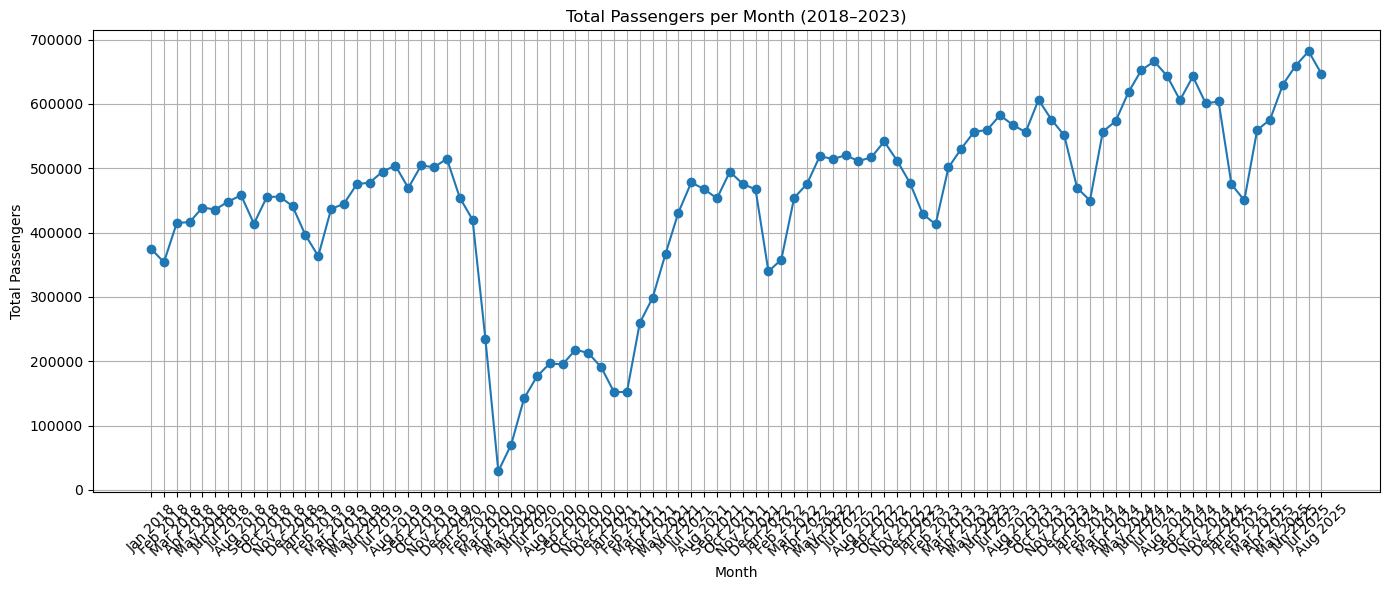

In [80]:
monthly_totals = df.groupby(["Year", "Month"])["Passengers"].sum().reset_index()

# Ensure months are in the right order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
monthly_totals["Month"] = pd.Categorical(monthly_totals["Month"], categories=month_order, ordered=True)
monthly_totals = monthly_totals.sort_values(["Year", "Month"])

# Create short labels for the x-axis (e.g., Jan 2018)
monthly_totals["Label"] = monthly_totals["Month"].str[:3] + " " + monthly_totals["Year"].astype(str)

# Plot the data
plt.figure(figsize=(14, 6))
plt.plot(monthly_totals["Label"], monthly_totals["Passengers"], marker='o')
plt.title("Total Passengers per Month (2018–2023)")
plt.xlabel("Month")
plt.ylabel("Total Passengers")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Slope of best-fit line: 2894.10 passengers per month
Average monthly % increase: 0.495%
Annual % increase (linear): 5.94%
Annual % increase (compounded): 6.10%


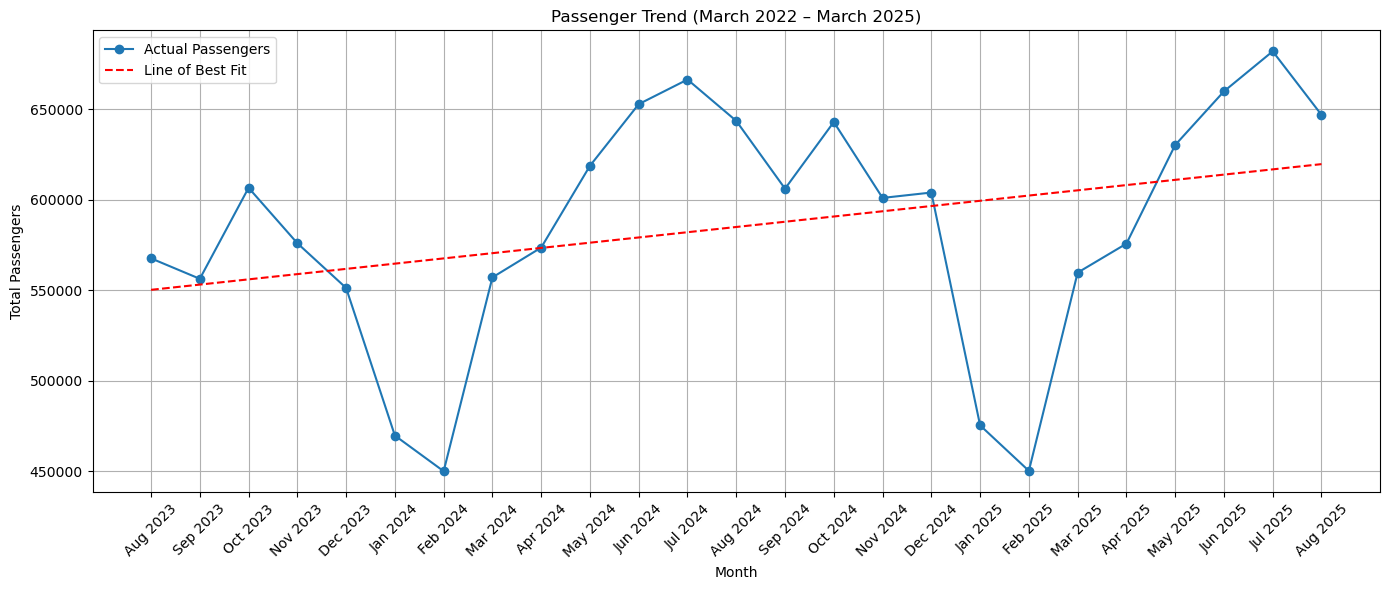

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Filter data from March 2022 to March 2025 ---
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
monthly_totals["Month"] = pd.Categorical(monthly_totals["Month"], categories=month_order, ordered=True)
monthly_totals["Month_Num"] = monthly_totals["Month"].cat.codes + 1

filtered = monthly_totals[
    (
        ((monthly_totals["Year"] > 2023) | ((monthly_totals["Year"] == 2023) & (monthly_totals["Month_Num"] >= 8)))
        & ((monthly_totals["Year"] < 2025) | ((monthly_totals["Year"] == 2025) & (monthly_totals["Month_Num"] <= 8)))
    )
].copy().reset_index(drop=True)

# --- Regression for trend line ---
x = np.arange(len(filtered))
y = filtered["Passengers"].values
slope, intercept = np.polyfit(x, y, 1)
trend = slope * x + intercept

# --- Percentage slope calculations ---
avg_passengers = np.mean(y)
monthly_percent_increase = slope / avg_passengers
annual_percent_increase_linear = monthly_percent_increase * 12 * 100
annual_percent_increase_compound = ((1 + monthly_percent_increase) ** 12 - 1) * 100

print(f"Slope of best-fit line: {slope:.2f} passengers per month")
print(f"Average monthly % increase: {monthly_percent_increase * 100:.3f}%")
print(f"Annual % increase (linear): {annual_percent_increase_linear:.2f}%")
print(f"Annual % increase (compounded): {annual_percent_increase_compound:.2f}%")

# --- Plot ---
plt.figure(figsize=(14, 6))
plt.plot(filtered["Label"], filtered["Passengers"], marker='o', label="Actual Passengers")
plt.plot(filtered["Label"], trend, color='red', linestyle='--', label="Line of Best Fit")
plt.title("Passenger Trend (March 2022 – March 2025)")
plt.xlabel("Month")
plt.ylabel("Total Passengers")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Airline
Southwest Airlines      17388080
American Airlines        6980219
Delta Air Lines          3897297
Frontier Airlines        3893436
Alaska Airlines          3250037
United Airlines          3002991
Volaris                   963209
China Airlines            923745
JetBlue                   524216
Hawaiian Airlines         510247
Avianca                   216649
All Others                 37029
Starlux Airlines           23242
Volaris El Salvador        19943
New Pacific Airlines        7418
Avelo Airlines              6046
aha!                        5646
New Pacific                 4740
Northern Pacific            3909
Aeromexico                  3048
Name: Passengers, dtype: int64


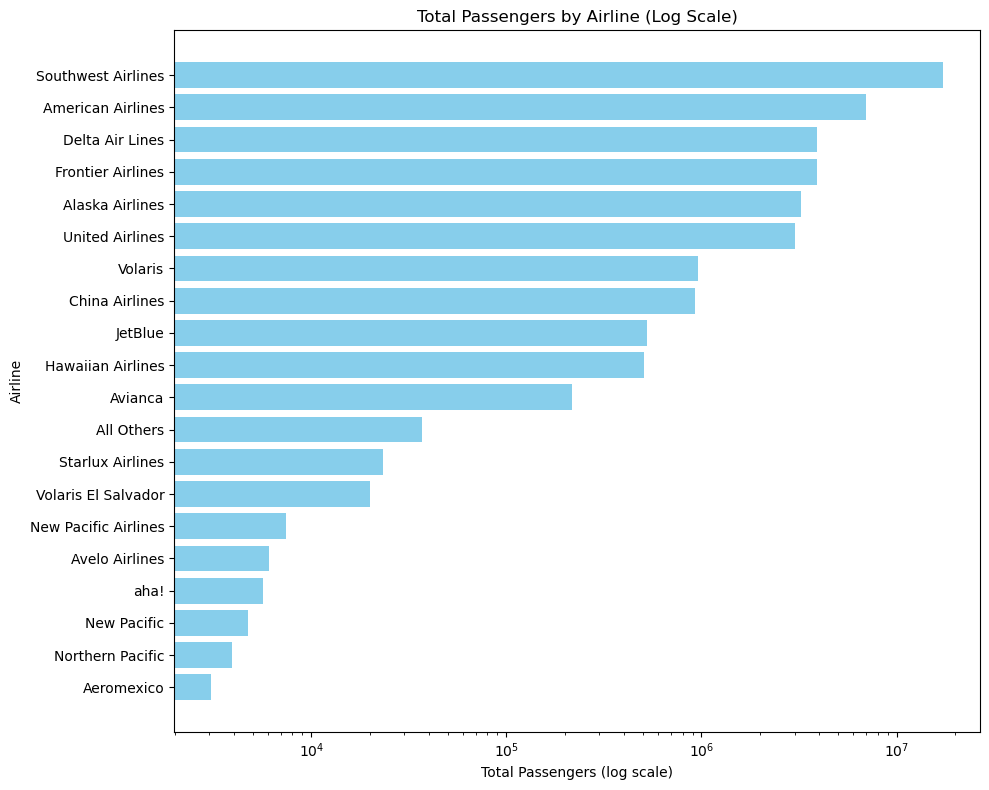

In [82]:
# show which airlines bring in the most passengers
# airlines with more flights are more likely to create higher parking demand around their gates/terminals

airline_totals = df.groupby("Airline")["Passengers"].sum().sort_values(ascending=False)

print(airline_totals)

plt.figure(figsize=(10, 8))
plt.barh(airline_totals.index, airline_totals.values, color="skyblue")
plt.xscale("log")
plt.title("Total Passengers by Airline (Log Scale)")
plt.xlabel("Total Passengers (log scale)")
plt.ylabel("Airline")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

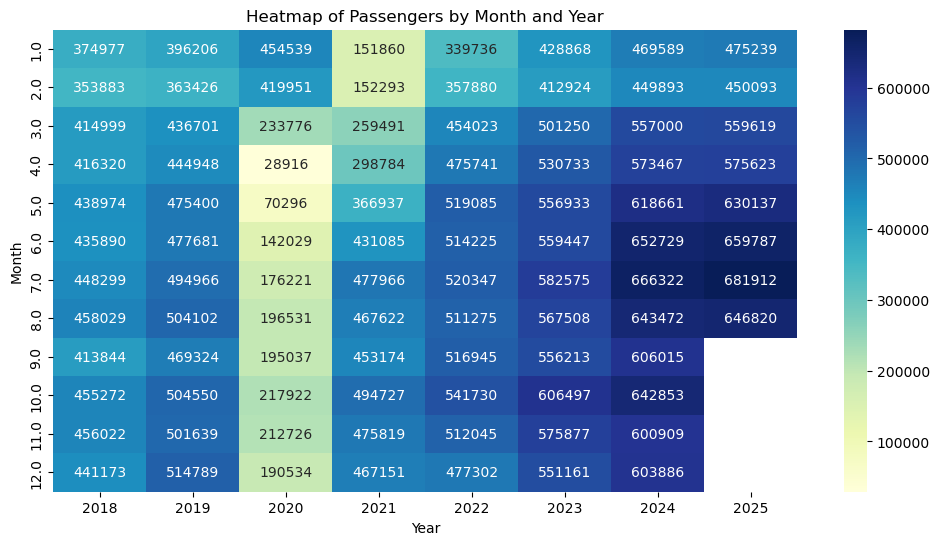

In [85]:
pivot = df.pivot_table(index='Month_num', columns='Year', values='Passengers', aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Passengers by Month and Year')
plt.ylabel('Month')
plt.show()

In [87]:
print(df["Year"].unique())
print(df["Year"].dtype)

[2018 2019 2020 2021 2022 2023 2024 2025]
int64


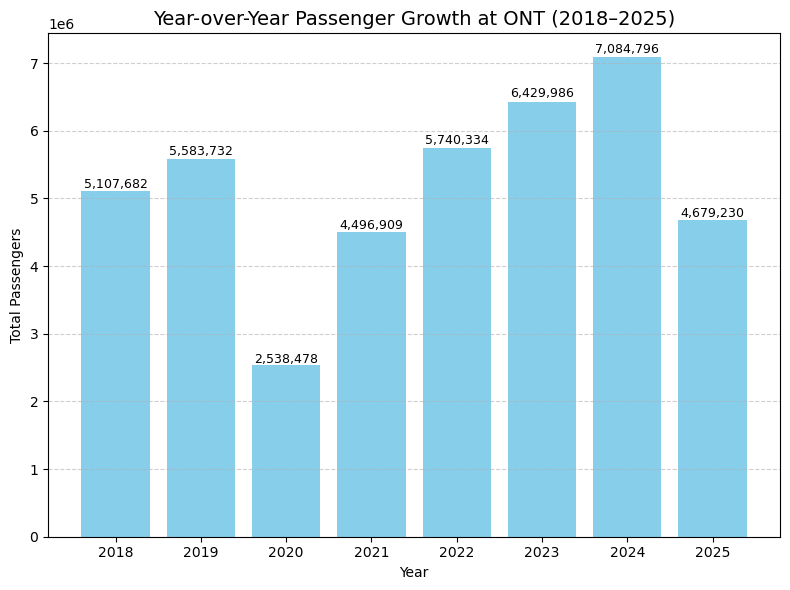

In [88]:
# Group total passengers by year
yearly_totals = df.groupby("Year")["Passengers"].sum().sort_index()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(yearly_totals.index, yearly_totals.values, color="skyblue")

# Add titles and labels
plt.title("Year-over-Year Passenger Growth at ONT (2018–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Passengers")

# Add value labels on top of bars
for i, v in enumerate(yearly_totals.values):
    plt.text(yearly_totals.index[i], v + (v * 0.01), f"{v:,.0f}", 
             ha='center', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [89]:
monthly_totals.tail(20)

,Year,Month,Passengers,Label,Month_Num
76,2024,January,469589,Jan 2024,1
75,2024,February,449893,Feb 2024,2
79,2024,March,557000,Mar 2024,3
72,2024,April,573467,Apr 2024,4
80,2024,May,618661,May 2024,5
78,2024,June,652729,Jun 2024,6
77,2024,July,666322,Jul 2024,7
73,2024,August,643472,Aug 2024,8
83,2024,September,606015,Sep 2024,9
82,2024,October,642853,Oct 2024,10


In [90]:
import numpy as np

# Select years and passengers
years = np.array([2022, 2023, 2024])
passengers = yearly_totals.loc[2022:2024].values

# Fit a linear model
slope, intercept = np.polyfit(years, passengers, 1)

print(f"Slope (average change per year) from 2022 to 2024: {slope:,.0f} passengers/year")


Slope (average change per year) from 2022 to 2024: 672,231 passengers/year


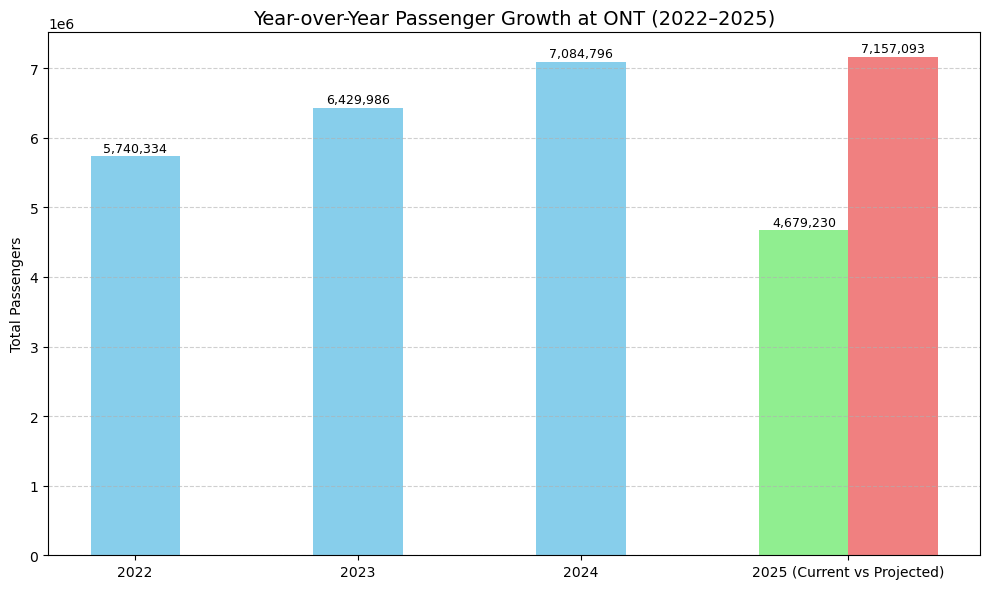

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Work on a copy to keep original data intact
mt_copy = monthly_totals.copy()
mt_copy.columns = mt_copy.columns.str.strip()

# Actual totals 2022-2024
df_actuals = mt_copy[mt_copy['Year'].between(2022, 2024)]
yearly_totals = df_actuals.groupby('Year')['Passengers'].sum()

# 2025 current months (Jan–Aug)
df_2025 = mt_copy[mt_copy['Year']==2025]
current_2025_total = df_2025['Passengers'].sum()

# --- Compute average multiplier Jan–Aug 2024 → 2025 ---
jan_aug_2024 = mt_copy[(mt_copy['Year']==2024) & (mt_copy['Month_Num']<=8)]
jan_aug_2025 = mt_copy[(mt_copy['Year']==2025) & (mt_copy['Month_Num']<=8)]

multipliers = jan_aug_2025['Passengers'].values / jan_aug_2024['Passengers'].values
avg_multiplier = multipliers.mean()  # average growth factor

# --- Project Sept–Dec 2025 ---
sept_dec_2024 = mt_copy[(mt_copy['Year']==2024) & (mt_copy['Month_Num']>=9) & (mt_copy['Month_Num']<=12)]
projected_sept_dec_2025 = sept_dec_2024['Passengers'] * avg_multiplier

# Full 2025 projected total
projected_2025_total = current_2025_total + projected_sept_dec_2025.sum()

# --- Combine totals for plotting ---
totals = {
    2022: yearly_totals.get(2022,0),
    2023: yearly_totals.get(2023,0),
    2024: yearly_totals.get(2024,0),
    '2025 Current': current_2025_total,
    '2025 Projected': projected_2025_total
}

# --- Plot as grouped bars ---
x_base = np.array([0,1,2])      # 2022-2024
x_2025 = np.array([3,3.4])      # 2025 Current vs Projected

y_base = [totals[2022], totals[2023], totals[2024]]
y_2025 = [totals['2025 Current'], totals['2025 Projected']]

plt.figure(figsize=(10,6))
plt.bar(x_base, y_base, color='skyblue', width=0.4)
plt.bar(x_2025, y_2025, color=['lightgreen','lightcoral'], width=0.4)

plt.xticks([0,1,2,3.2], [2022,2023,2024,'2025 (Current vs Projected)'])
plt.ylabel("Total Passengers")
plt.title("Year-over-Year Passenger Growth at ONT (2022–2025)", fontsize=14)

# Add value labels
for i, v in enumerate(y_base):
    plt.text(x_base[i], v + (v*0.01), f"{v:,.0f}", ha='center', fontsize=9)
for i, v in enumerate(y_2025):
    plt.text(x_2025[i], v + (v*0.01), f"{v:,.0f}", ha='center', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


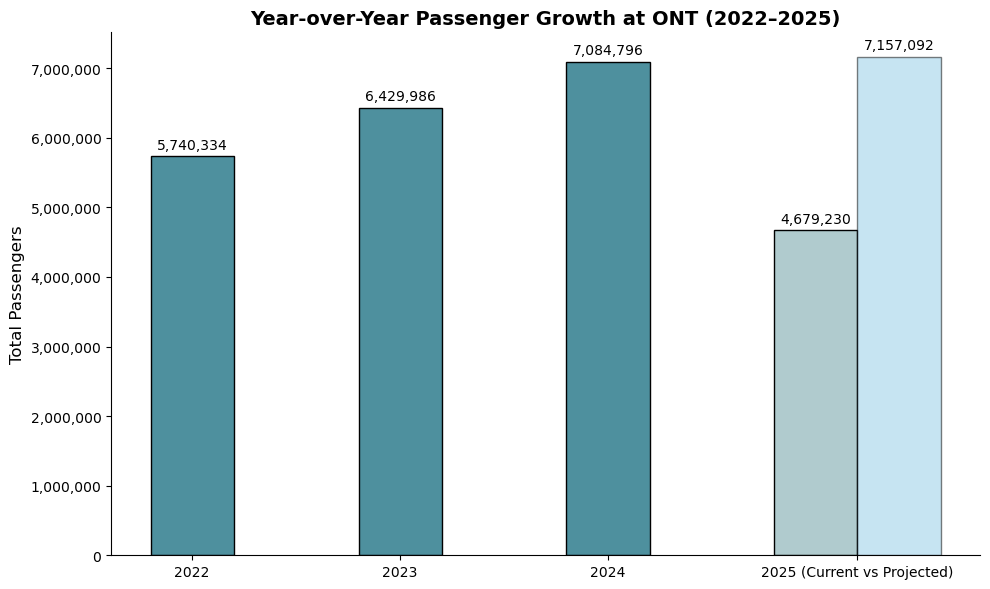

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Work on a copy to keep original data intact
mt_copy = monthly_totals.copy()
mt_copy.columns = mt_copy.columns.str.strip()

# Actual totals 2022-2024
df_actuals = mt_copy[mt_copy['Year'].between(2022, 2024)]
yearly_totals = df_actuals.groupby('Year')['Passengers'].sum()

# 2025 current months (Jan–Aug)
df_2025 = mt_copy[mt_copy['Year']==2025]
current_2025_total = df_2025['Passengers'].sum()

# Compute average multiplier Jan–Aug 2024 → 2025
jan_aug_2024 = mt_copy[(mt_copy['Year']==2024) & (mt_copy['Month_Num']<=8)]
jan_aug_2025 = mt_copy[(mt_copy['Year']==2025) & (mt_copy['Month_Num']<=8)]
multipliers = jan_aug_2025['Passengers'].values / jan_aug_2024['Passengers'].values
avg_multiplier = multipliers.mean()

# Project Sept–Dec 2025
sept_dec_2024 = mt_copy[(mt_copy['Year']==2024) & (mt_copy['Month_Num']>=9) & (mt_copy['Month_Num']<=12)]
projected_sept_dec_2025 = sept_dec_2024['Passengers'] * avg_multiplier

# Full 2025 projected total
projected_2025_total = current_2025_total + projected_sept_dec_2025.sum()

# Combine totals for plotting
totals = {
    2022: yearly_totals.get(2022,0),
    2023: yearly_totals.get(2023,0),
    2024: yearly_totals.get(2024,0),
    '2025 Current': current_2025_total,
    '2025 Projected': projected_2025_total
}

# --- Plot as grouped bars ---
x_base = np.array([0,1,2])      # 2022-2024
x_2025_current = np.array([3])  # 2025 Current
x_2025_projected = np.array([3.4])  # 2025 Projected

y_base = [totals[2022], totals[2023], totals[2024]]
y_2025_current = [totals['2025 Current']]
y_2025_projected = [totals['2025 Projected']]

# Colors
colors_base = ['#4e909e','#4e909e','#4e909e']   # 2022-2024
color_2025_current = '#b0cbce'
color_2025_projected = '#8ecae6'

plt.figure(figsize=(10,6))
# Base bars
bars_base = plt.bar(x_base, y_base, color=colors_base, edgecolor='black', width=0.4)
# 2025 Current
bars_2025_current = plt.bar(x_2025_current, y_2025_current, color=color_2025_current, edgecolor='black', width=0.4)
# 2025 Projected (semi-transparent)
bars_2025_projected = plt.bar(x_2025_projected, y_2025_projected, color=color_2025_projected, edgecolor='black', width=0.4, alpha=0.5)

# Add value labels
for bar in list(bars_base) + list(bars_2025_current) + list(bars_2025_projected):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + (height*0.01),
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# X-axis labels
plt.xticks([0,1,2,3.2], [2022,2023,2024,'2025 (Current vs Projected)'])

# Y-axis formatting: plain numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Title, labels, remove top/right spines
plt.title("Year-over-Year Passenger Growth at ONT (2022–2025)", fontsize=14, weight='bold')
plt.ylabel("Total Passengers", fontsize=12)
sns.despine()
plt.grid(False)
plt.tight_layout()

# --- Save the figure ---
plt.savefig(
    "yearbyyear.png",  # filename
    dpi=300,                       # high resolution for presentations
    bbox_inches='tight'            # remove extra whitespace
)

plt.show()


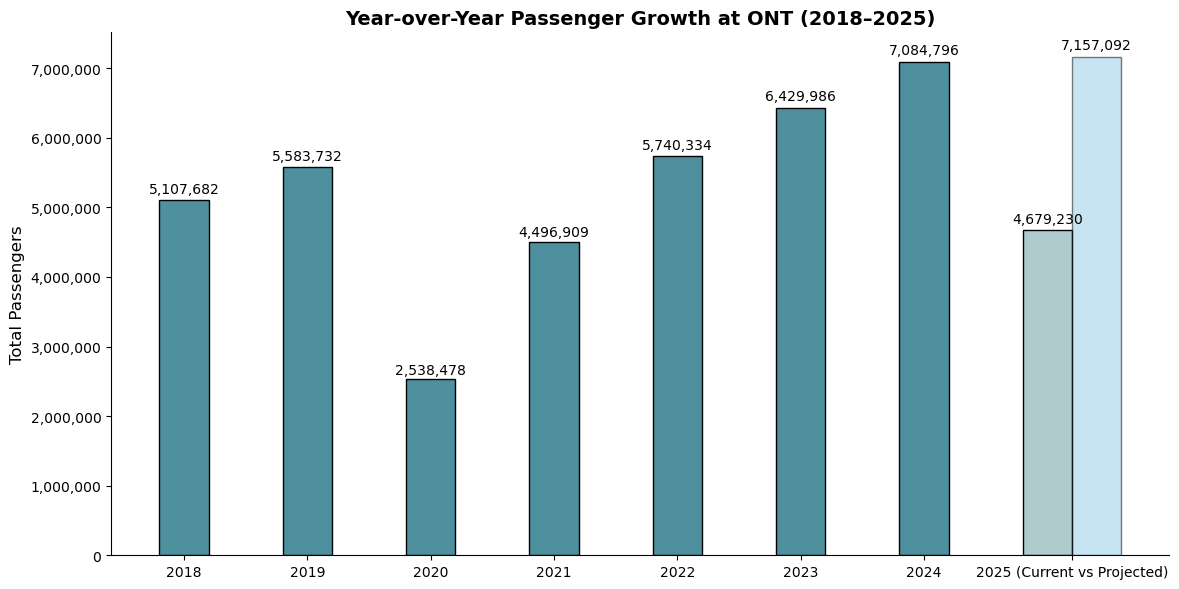

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Work on a copy to keep original data intact
mt_copy = monthly_totals.copy()
mt_copy.columns = mt_copy.columns.str.strip()

# Actual totals 2018-2024
df_actuals = mt_copy[mt_copy['Year'].between(2018, 2024)]
yearly_totals = df_actuals.groupby('Year')['Passengers'].sum()

# 2025 current months (Jan–Aug)
df_2025 = mt_copy[mt_copy['Year']==2025]
current_2025_total = df_2025['Passengers'].sum()

# Compute average multiplier Jan–Aug 2024 → 2025
jan_aug_2024 = mt_copy[(mt_copy['Year']==2024) & (mt_copy['Month_Num']<=8)]
jan_aug_2025 = mt_copy[(mt_copy['Year']==2025) & (mt_copy['Month_Num']<=8)]
multipliers = jan_aug_2025['Passengers'].values / jan_aug_2024['Passengers'].values
avg_multiplier = multipliers.mean()

# Project Sept–Dec 2025
sept_dec_2024 = mt_copy[(mt_copy['Year']==2024) & (mt_copy['Month_Num']>=9) & (mt_copy['Month_Num']<=12)]
projected_sept_dec_2025 = sept_dec_2024['Passengers'] * avg_multiplier

# Full 2025 projected total
projected_2025_total = current_2025_total + projected_sept_dec_2025.sum()

# Combine totals for plotting
totals = {year: yearly_totals.get(year,0) for year in range(2018,2025)}
totals['2025 Current'] = current_2025_total
totals['2025 Projected'] = projected_2025_total

# --- Plot as grouped bars ---
x_base = np.arange(0,7)          # 2018-2024 (7 bars)
x_2025_current = np.array([7])   # 2025 Current
x_2025_projected = np.array([7.4])  # 2025 Projected

y_base = [totals[year] for year in range(2018,2025)]
y_2025_current = [totals['2025 Current']]
y_2025_projected = [totals['2025 Projected']]

# Colors
colors_base = ['#4e909e']*7       # 2018-2024
color_2025_current = '#b0cbce'
color_2025_projected = '#8ecae6'

plt.figure(figsize=(12,6))
# Base bars
bars_base = plt.bar(x_base, y_base, color=colors_base, edgecolor='black', width=0.4)
# 2025 Current
bars_2025_current = plt.bar(x_2025_current, y_2025_current, color=color_2025_current, edgecolor='black', width=0.4)
# 2025 Projected (semi-transparent)
bars_2025_projected = plt.bar(x_2025_projected, y_2025_projected, color=color_2025_projected, edgecolor='black', width=0.4, alpha=0.5)

# Add value labels
for bar in list(bars_base) + list(bars_2025_current) + list(bars_2025_projected):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + (height*0.01),
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# X-axis labels
xticks = list(range(7)) + [7.2]
xlabels = list(range(2018,2025)) + ['2025 (Current vs Projected)']
plt.xticks(xticks, xlabels)

# Y-axis formatting: plain numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Title, labels, remove top/right spines
plt.title("Year-over-Year Passenger Growth at ONT (2018–2025)", fontsize=14, weight='bold')
plt.ylabel("Total Passengers", fontsize=12)
sns.despine()
plt.grid(False)
plt.tight_layout()

# --- Save the figure ---
plt.savefig(
    "yearbyyear_2018.png",  # filename
    dpi=300,                 # high resolution
    bbox_inches='tight'      # remove extra whitespace
)

plt.show()


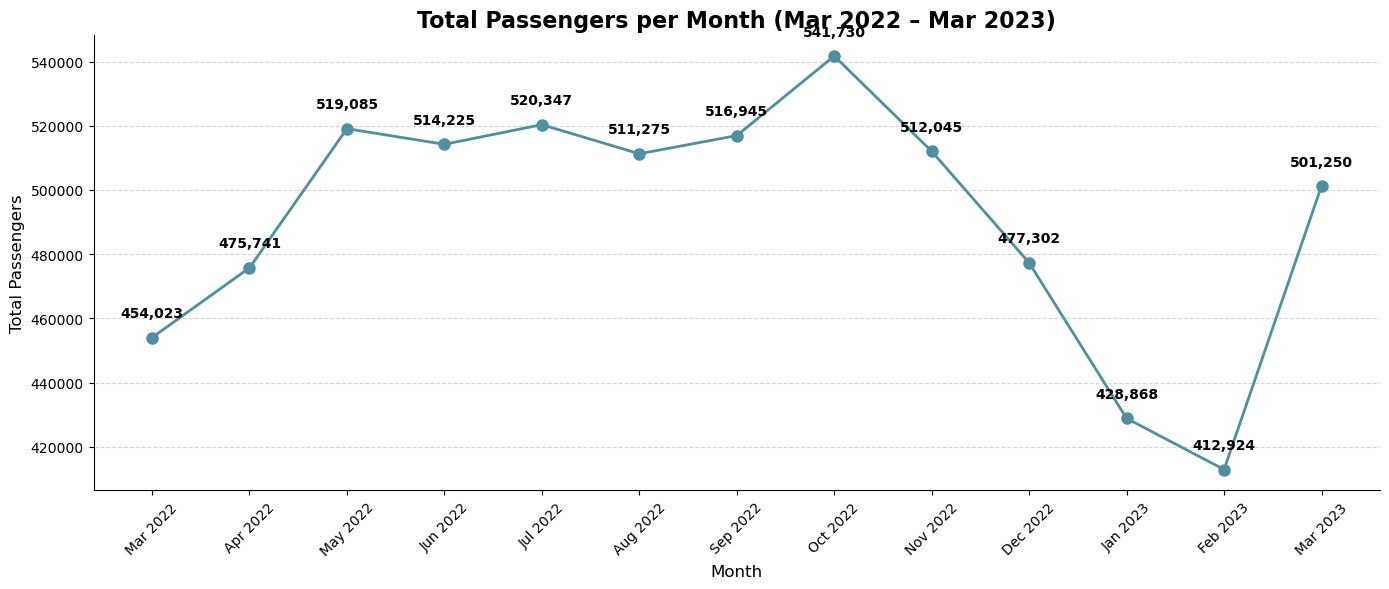

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Mar 2022 → Mar 2023
mask = (
    ((monthly_totals['Year'] == 2022) & (monthly_totals['Month'] >= 'March')) |
    ((monthly_totals['Year'] == 2023) & (monthly_totals['Month'] <= 'March'))
)
subset = monthly_totals[mask]

# --- Plot ---
plt.figure(figsize=(14,6))
plt.plot(
    subset["Label"],
    subset["Passengers"],
    marker='o',
    color='#4e909e',
    linewidth=2,
    markersize=8
)

# Add value labels above points
for x, y in zip(subset["Label"], subset["Passengers"]):
    plt.text(
        x, y + max(subset["Passengers"])*0.01,
        f'{y:,}',
        ha='center',
        va='bottom',
        fontsize=10,
        weight='bold'
    )

# Styling
plt.title("Total Passengers per Month (Mar 2022 – Mar 2023)", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Passengers", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()

# --- Save figure ---
plt.savefig(
    "passengers_mar2022_mar2023.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()


In [142]:
df2 = pd.read_csv("COMBINEDparkingdata.csv")
df2.head()

,Date,Day,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 2 Value % Capacity,LOT 2 Value Occupied,...,LOT 5 Spaces,LOT 5 Value % Capacity,LOT 5 Value Occupied,LOT 5 Value Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Facility % Capacity,Total Facility Occupied,Total Facility Spaces
0,5/1/2020,Friday,0.0,0.0,1219,0.0,0.0,324,0.0,0.0,...,2200,0.0,0.0,0,-1.0,-1.0,-1,0.0,0,6717
1,5/2/2020,Saturday,0.0,0.0,1219,0.0,0.0,324,0.0,0.0,...,2200,0.0,0.0,0,-1.0,-1.0,-1,0.0,0,6717
2,5/3/2020,Sunday,0.0,0.0,1219,0.0,0.0,324,0.0,0.0,...,2200,0.0,0.0,0,-1.0,-1.0,-1,0.0,0,6717
3,5/4/2020,Monday,0.0,0.0,1219,0.0,0.0,324,0.0,0.0,...,2200,0.0,0.0,0,-1.0,-1.0,-1,0.0,0,6717
4,5/5/2020,Tuesday,0.0,0.0,1219,0.0,0.0,324,0.0,0.0,...,2200,0.0,0.0,0,-1.0,-1.0,-1,0.0,0,6717


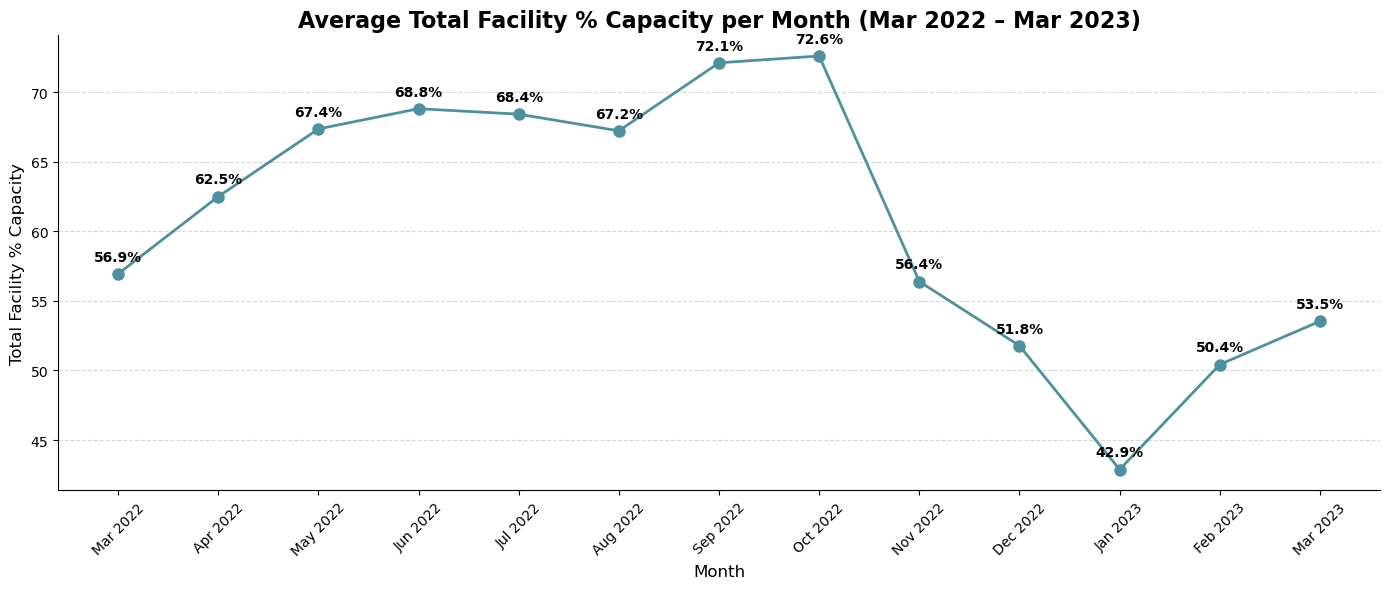

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure Date is datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Filter March 2022 → March 2023
mask = (df2['Date'] >= '2022-03-01') & (df2['Date'] <= '2023-03-31')
subset = df2.loc[mask].copy()

# Group by month using the first day of each month as the key
subset['MonthStart'] = subset['Date'].values.astype('datetime64[M]')
monthly_avg = subset.groupby('MonthStart')['Total Facility % Capacity'].mean().reset_index()

# Create x-axis labels (e.g., Mar 2022)
monthly_avg['Label'] = monthly_avg['MonthStart'].dt.strftime('%b %Y')

# --- Plot ---
plt.figure(figsize=(14,6))
plt.plot(
    monthly_avg['Label'],
    monthly_avg['Total Facility % Capacity'],
    marker='o',
    color='#4e909e',
    linewidth=2,
    markersize=8
)

# Add percentage labels above each point
for x, y in zip(monthly_avg['Label'], monthly_avg['Total Facility % Capacity']):
    plt.text(
        x, y + max(monthly_avg['Total Facility % Capacity'])*0.01,
        f'{y:.1f}%',  # format as percentage
        ha='center',
        va='bottom',
        fontsize=10,
        weight='bold'
    )

# Styling
plt.title("Average Total Facility % Capacity per Month (Mar 2022 – Mar 2023)", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Facility % Capacity", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()

# --- Save figure ---
plt.savefig(
    "avg_total_facility_mar2022_mar2023.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()


C:\Users\benja\AppData\Local\Temp\ipykernel_23088\2497186440.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(passengers_subset["Label"], rotation=45)
C:\Users\benja\AppData\Local\Temp\ipykernel_23088\2497186440.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(monthly_avg_facility['Label'], rotation=45)


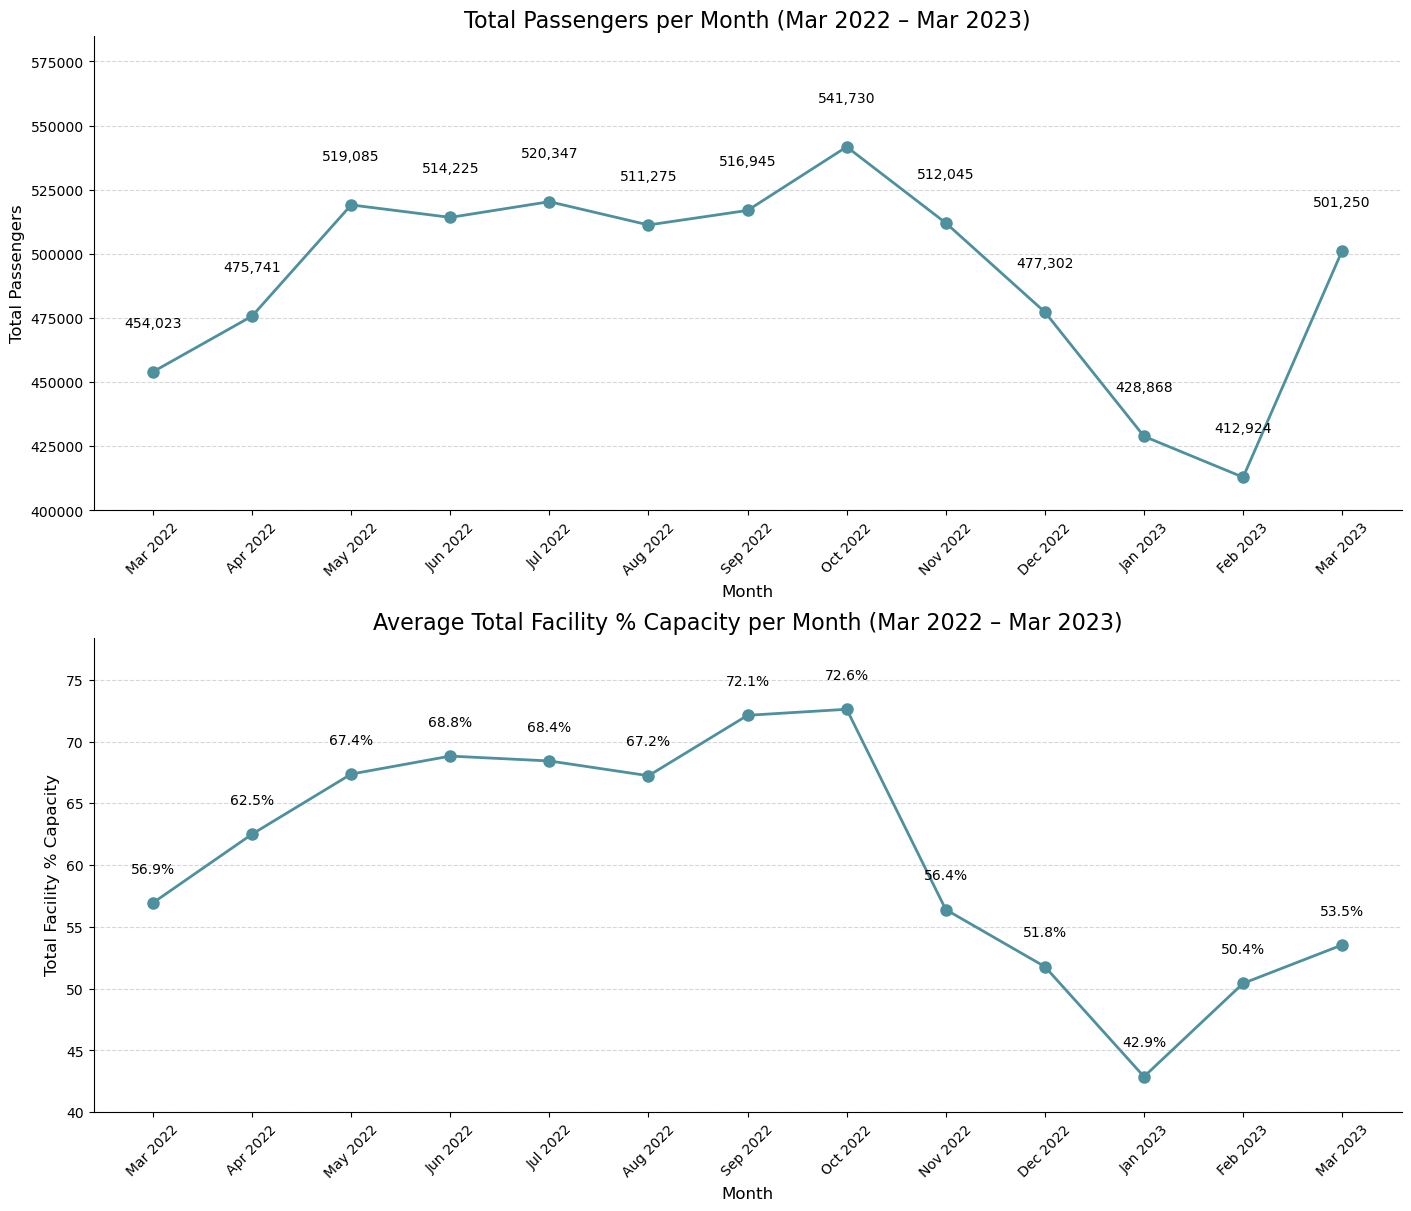

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Prepare Passengers Data ---
mask_passengers = (
    ((monthly_totals['Year'] == 2022) & (monthly_totals['Month'] >= 'March')) |
    ((monthly_totals['Year'] == 2023) & (monthly_totals['Month'] <= 'March'))
)
passengers_subset = monthly_totals[mask_passengers]

# --- Prepare Total Facility Data ---
df2['Date'] = pd.to_datetime(df2['Date'])
mask_facility = (df2['Date'] >= '2022-03-01') & (df2['Date'] <= '2023-03-31')
facility_subset = df2.loc[mask_facility].copy()
facility_subset['MonthStart'] = facility_subset['Date'].values.astype('datetime64[M]')
monthly_avg_facility = facility_subset.groupby('MonthStart')['Total Facility % Capacity'].mean().reset_index()
monthly_avg_facility['Label'] = monthly_avg_facility['MonthStart'].dt.strftime('%b %Y')

# --- Create figure with 2 rows ---
fig, axes = plt.subplots(2, 1, figsize=(14,12), constrained_layout=True)

# --- Plot Passengers ---
axes[0].plot(
    passengers_subset["Label"],
    passengers_subset["Passengers"],
    marker='o',
    color='#4e909e',
    linewidth=2,
    markersize=8
)
for x, y in zip(passengers_subset["Label"], passengers_subset["Passengers"]):
    axes[0].text(
        x, y + max(passengers_subset["Passengers"])*0.03,  # slightly higher
        f'{y:,}',
        ha='center',
        va='bottom',
        fontsize=10
    )
axes[0].set_title("Total Passengers per Month (Mar 2022 – Mar 2023)", fontsize=16, weight='normal')
axes[0].set_xlabel("Month", fontsize=12)
axes[0].set_ylabel("Total Passengers", fontsize=12)
axes[0].set_xticklabels(passengers_subset["Label"], rotation=45)
axes[0].set_ylim(400000, max(passengers_subset["Passengers"])*1.08)  # upper limit slightly higher
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
sns.despine(ax=axes[0])

# --- Plot Total Facility % Capacity ---
axes[1].plot(
    monthly_avg_facility['Label'],
    monthly_avg_facility['Total Facility % Capacity'],
    marker='o',
    color='#4e909e',
    linewidth=2,
    markersize=8
)
for x, y in zip(monthly_avg_facility['Label'], monthly_avg_facility['Total Facility % Capacity']):
    axes[1].text(
        x, y + max(monthly_avg_facility['Total Facility % Capacity'])*0.03,  # slightly higher
        f'{y:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )
axes[1].set_title("Average Total Facility % Capacity per Month (Mar 2022 – Mar 2023)", fontsize=16, weight='normal')
axes[1].set_xlabel("Month", fontsize=12)
axes[1].set_ylabel("Total Facility % Capacity", fontsize=12)
axes[1].set_xticklabels(monthly_avg_facility['Label'], rotation=45)
axes[1].set_ylim(40, max(monthly_avg_facility['Total Facility % Capacity'])*1.08)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
sns.despine(ax=axes[1])

# --- Save figure ---
plt.savefig(
    "passengers_and_facility_mar2022_mar2023.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()
